# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
The shape of the data has 1898 rows and 9 columns. 

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The data has 9 columns and 1898 entries and it has 3 data types float int and object. 
float --> cost_of_the_order 
int --> order_id,customer_id,food_preparation_time,delivery_time
object --> restaurant_name,cuisine_type,day_of_the_week,rating

- rating should be int type but it is object due to missing element "Not given"

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# Write your code here
df["rating"].unique

#df.isnull().sum()

<bound method Series.unique of 0       Not given
1       Not given
2               5
3               3
4               4
          ...    
1893            5
1894            5
1895    Not given
1896            5
1897    Not given
Name: rating, Length: 1898, dtype: object>

In [8]:
df["rating"].apply(type).value_counts()

rating
<class 'str'>    1898
Name: count, dtype: int64

In [9]:
df["rating"].value_counts(normalize=True)

rating
Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: proportion, dtype: float64

In [10]:
df_rating=df.loc[df["rating"]=="Not given"].copy()
df_rating_weekend=df_rating.loc[df_rating["day_of_the_week"]=="Weekend"]
print("df_rating_weekend")
print(df_rating_weekend.describe())
df_rating_weekday=df_rating.loc[df_rating["day_of_the_week"]=="Weekday"]
print("df_rating_weekday")
print(df_rating_weekday.describe())
print("df data")
print(df.describe())

df_rating_weekend
           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  5.290000e+02     529.000000         529.000000             529.000000   
mean   1.477453e+06  170118.124764          15.924669              27.446125   
std    5.542543e+02  111160.447577           7.288704               4.525750   
min    1.476551e+06    1311.000000           4.660000              20.000000   
25%    1.476950e+06   80434.000000          11.640000              24.000000   
50%    1.477451e+06  127149.000000          14.070000              27.000000   
75%    1.477925e+06  261371.000000          20.610000              31.000000   
max    1.478441e+06  405334.000000          33.220000              35.000000   

       delivery_time  
count     529.000000  
mean       22.521739  
std         4.712572  
min        15.000000  
25%        18.000000  
50%        22.000000  
75%        27.000000  
max        30.000000  
df_rating_weekday
           order_id    customer_id  

#### Observation
- 39 % of the data is Not given Which impact the rating column 
- 61 % of the data has 3,4,5 rating need to investigate relation ship with the other data 
- 529 of missing data for rating is from the Weekend
- 207 of missing data for rating is from weekday 
- By comparing the 3 different type of the data sets the count,mean,std,min,25%,50%,75%,max are almost the same 
- There are 2 things we can do 
- we can covert the Not Given to nan changes the rating from the string to float or int 
- we can drop the rating 
- we are going with the 1st approach 

In [11]:
df["rating"]=df["rating"].replace("Not given",np.nan)
df["rating"]

0       NaN
1       NaN
2         5
3         3
4         4
       ... 
1893      5
1894      5
1895    NaN
1896      5
1897    NaN
Name: rating, Length: 1898, dtype: object

In [12]:
df["rating"]=df["rating"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


#### Observations:
- In the data set the rating is having the 736 missing data. 
- the Unique values in raqting other that number is  NaN
- Not given is converted to nan in the rating and changes the data type to float

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [13]:
# Write your code here
min_time=df["food_preparation_time"].min()
max_time=df["food_preparation_time"].max()
avg_time=df["food_preparation_time"].mean()
print("min time",min_time)
print("max time",max_time)
print("avg_time",avg_time)
df["food_preparation_time"].describe()

min time 20
max time 35
avg_time 27.371970495258168


count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:
- time it takes for food to be prepared once an order is placed
- min time 20
- max time 35
- avg_time 27.371970495258168

### **Question 5:** How many orders are not rated? [1 mark]

In [14]:
# Write the code here
df["rating"].isna().sum()

736

#### Observations:
- 736 nan in the rating 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [15]:
# Write the code here
df.corr(numeric_only=True)

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,0.006308,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,0.007753,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.033983,0.041527,-0.029949
rating,0.006308,0.007753,0.033983,1.000000,-0.006083,-0.009804
food_preparation_time,-0.007026,-0.030330,0.041527,-0.006083,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,-0.009804,0.011094,1.000000


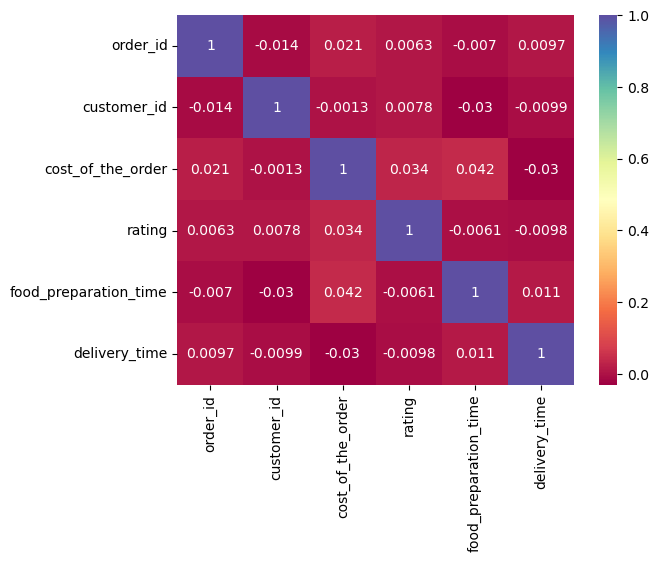

In [16]:
sns.heatmap(data=df.corr(numeric_only=True),cmap="Spectral",annot=True);

#### Observation 
- cost_of_the_order: Has Positive relation b/w rating(0.033983) and food_preparation_time(0.041527).
- rating: Has the Straight Positive Relation b/w cost_of_the_order(0.033983). There is negitive trend with food_preparation_time and delivery_time
- food_preparation_time : Has Positive relation b/w cost_of_the_order(0.041527) and delivery_time(0.011094). It shows food_preparation_time is fast the delivery_time is fast. 
- delivery_time:Has Positive relation b/w food_preparation_time(0.011094)
- Total Time : Has a co-relationship with food_preparation_time and food_preparation_time


#### cost_of_the_order
- Let check the Avg cost of an order using the histograms and box plot 


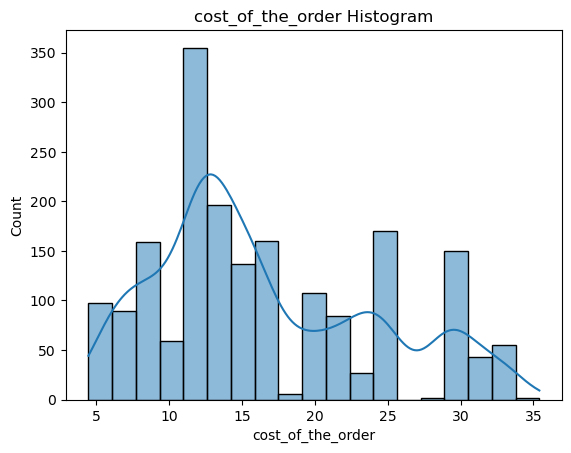

In [17]:
sns.histplot(data=df,x="cost_of_the_order",kde=True);
plt.title("cost_of_the_order Histogram");

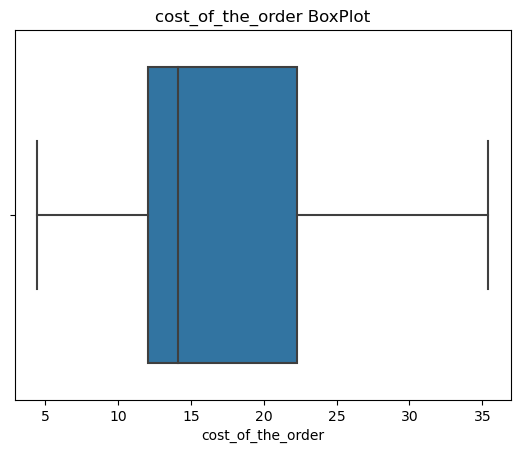

In [18]:
sns.boxplot(data=df,x="cost_of_the_order");
plt.title("cost_of_the_order BoxPlot");

#### Observation 
- The avg price of an order is nearly to 14 
- The max price 35 and the min price 5 
- There are multiple hump in the bars in range 11 to 17, 19 to 26 and 29 to 32. Need to analize more on these frenquency  

#### Let check the rating Given by the Customer 

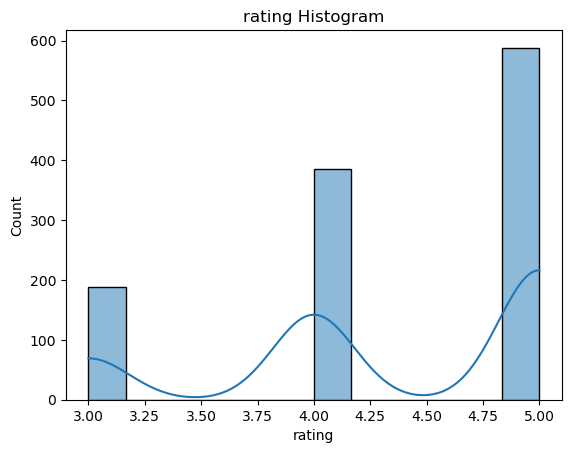

In [19]:
sns.histplot(data=df,x="rating",kde=True);
plt.title("rating Histogram");

4.344234079173838

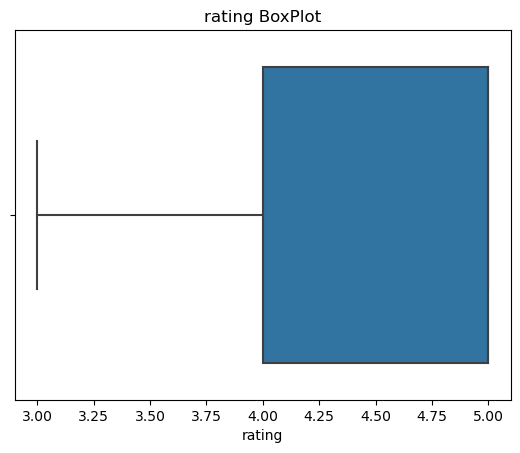

In [20]:
sns.boxplot(data=df,x="rating",dodge=True);
plt.title("rating BoxPlot");
df["rating"].mean()

#### Observation
- From the observation there are only 3 values in the rating 3,4 and 5 so we are seeing humps in these places.
- The data is left due to 50 % of the ratings are 5 star.
- Missing values can effect the data they could be 0 or 1 or 2 need to find out from the furtur analysis 
- Rating mean values around 4.3.
- 50% users have given 5 star remaing 20% is 3 star and 30% is the 4 star rating.
- There is 736 NAN Data in the rating which may effect the rating need to analize the data.

####  Let check the food_preparation_time 

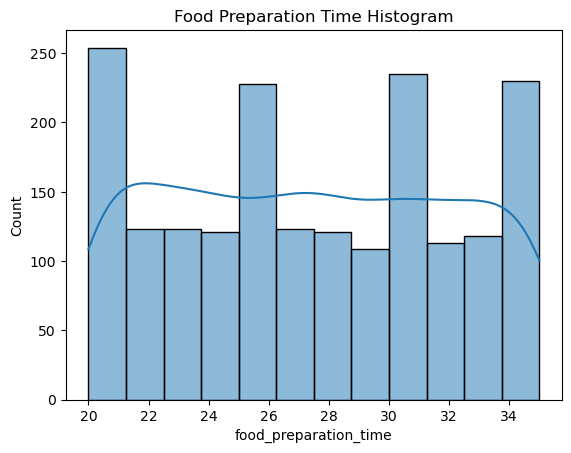

In [21]:
sns.histplot(data=df,x="food_preparation_time",kde=True,cbar=True);
plt.title("Food Preparation Time Histogram");

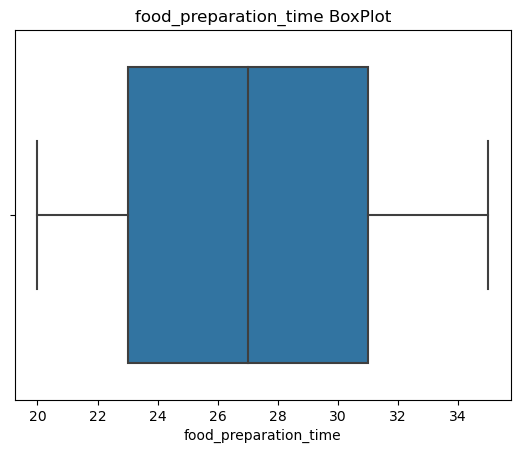

In [22]:
sns.boxplot(data=df,x="food_preparation_time")
plt.title("food_preparation_time BoxPlot");

#### Observation 
- The avg time 27 mins 
- The Time for the items to prepare is having the relation ship with the cost of the order which tells some items requires more time 
- 250 orders took 20 mins this is minimum time side on the higher side 225 orders took 35 mins to prepare 


#### Let check the delivery_time 

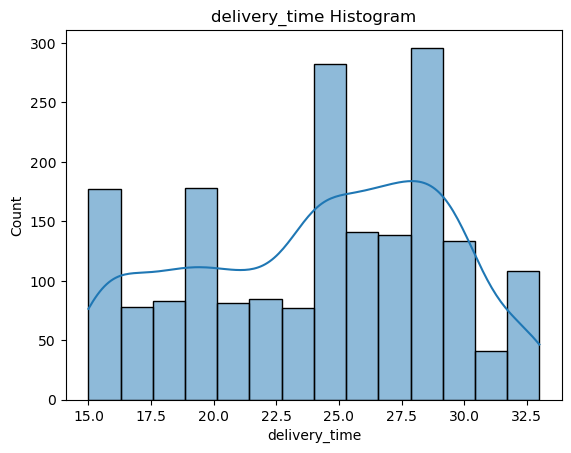

In [23]:
sns.histplot(data=df,x="delivery_time",kde=True);
plt.title("delivery_time Histogram");

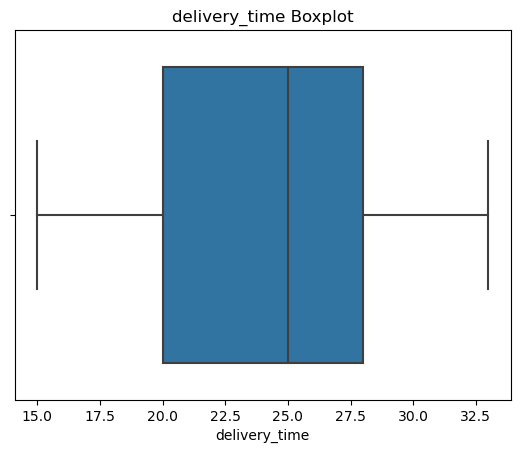

In [24]:
sns.boxplot(data=df,x="delivery_time");
plt.title("delivery_time Boxplot");

#### Observation 
- Avg time to delivery the food is 25, The min time is 15 and the max time 32.5
- 29 mins delivery time for the max 300 orders

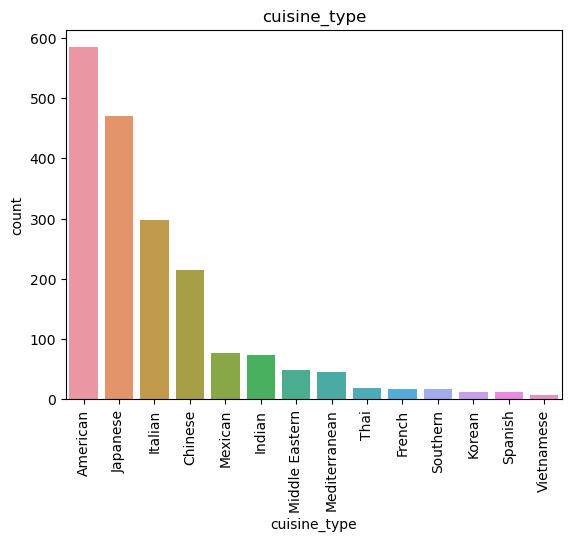

In [25]:
sns.countplot(data=df,x="cuisine_type",order=df["cuisine_type"].value_counts().index);
plt.xticks(rotation=90);
plt.title("cuisine_type");

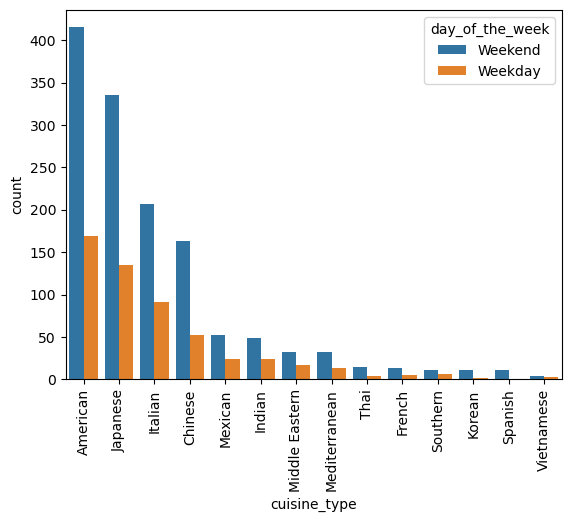

In [26]:
sns.countplot(data=df,x="cuisine_type",hue="day_of_the_week",order=df["cuisine_type"].value_counts().index);
plt.xticks(rotation=90);

#### Observation:
- American Cuisine is the top around 600 order, followed by Japanese around 490 order
- Vietnamese, Spanish,Korean are the bottom 3 
- The cuisine in the weekday and the weekend are almost the same 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

/Users/saisampath/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
/Users/saisampath/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
/Users/saisampath/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/saisampath/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


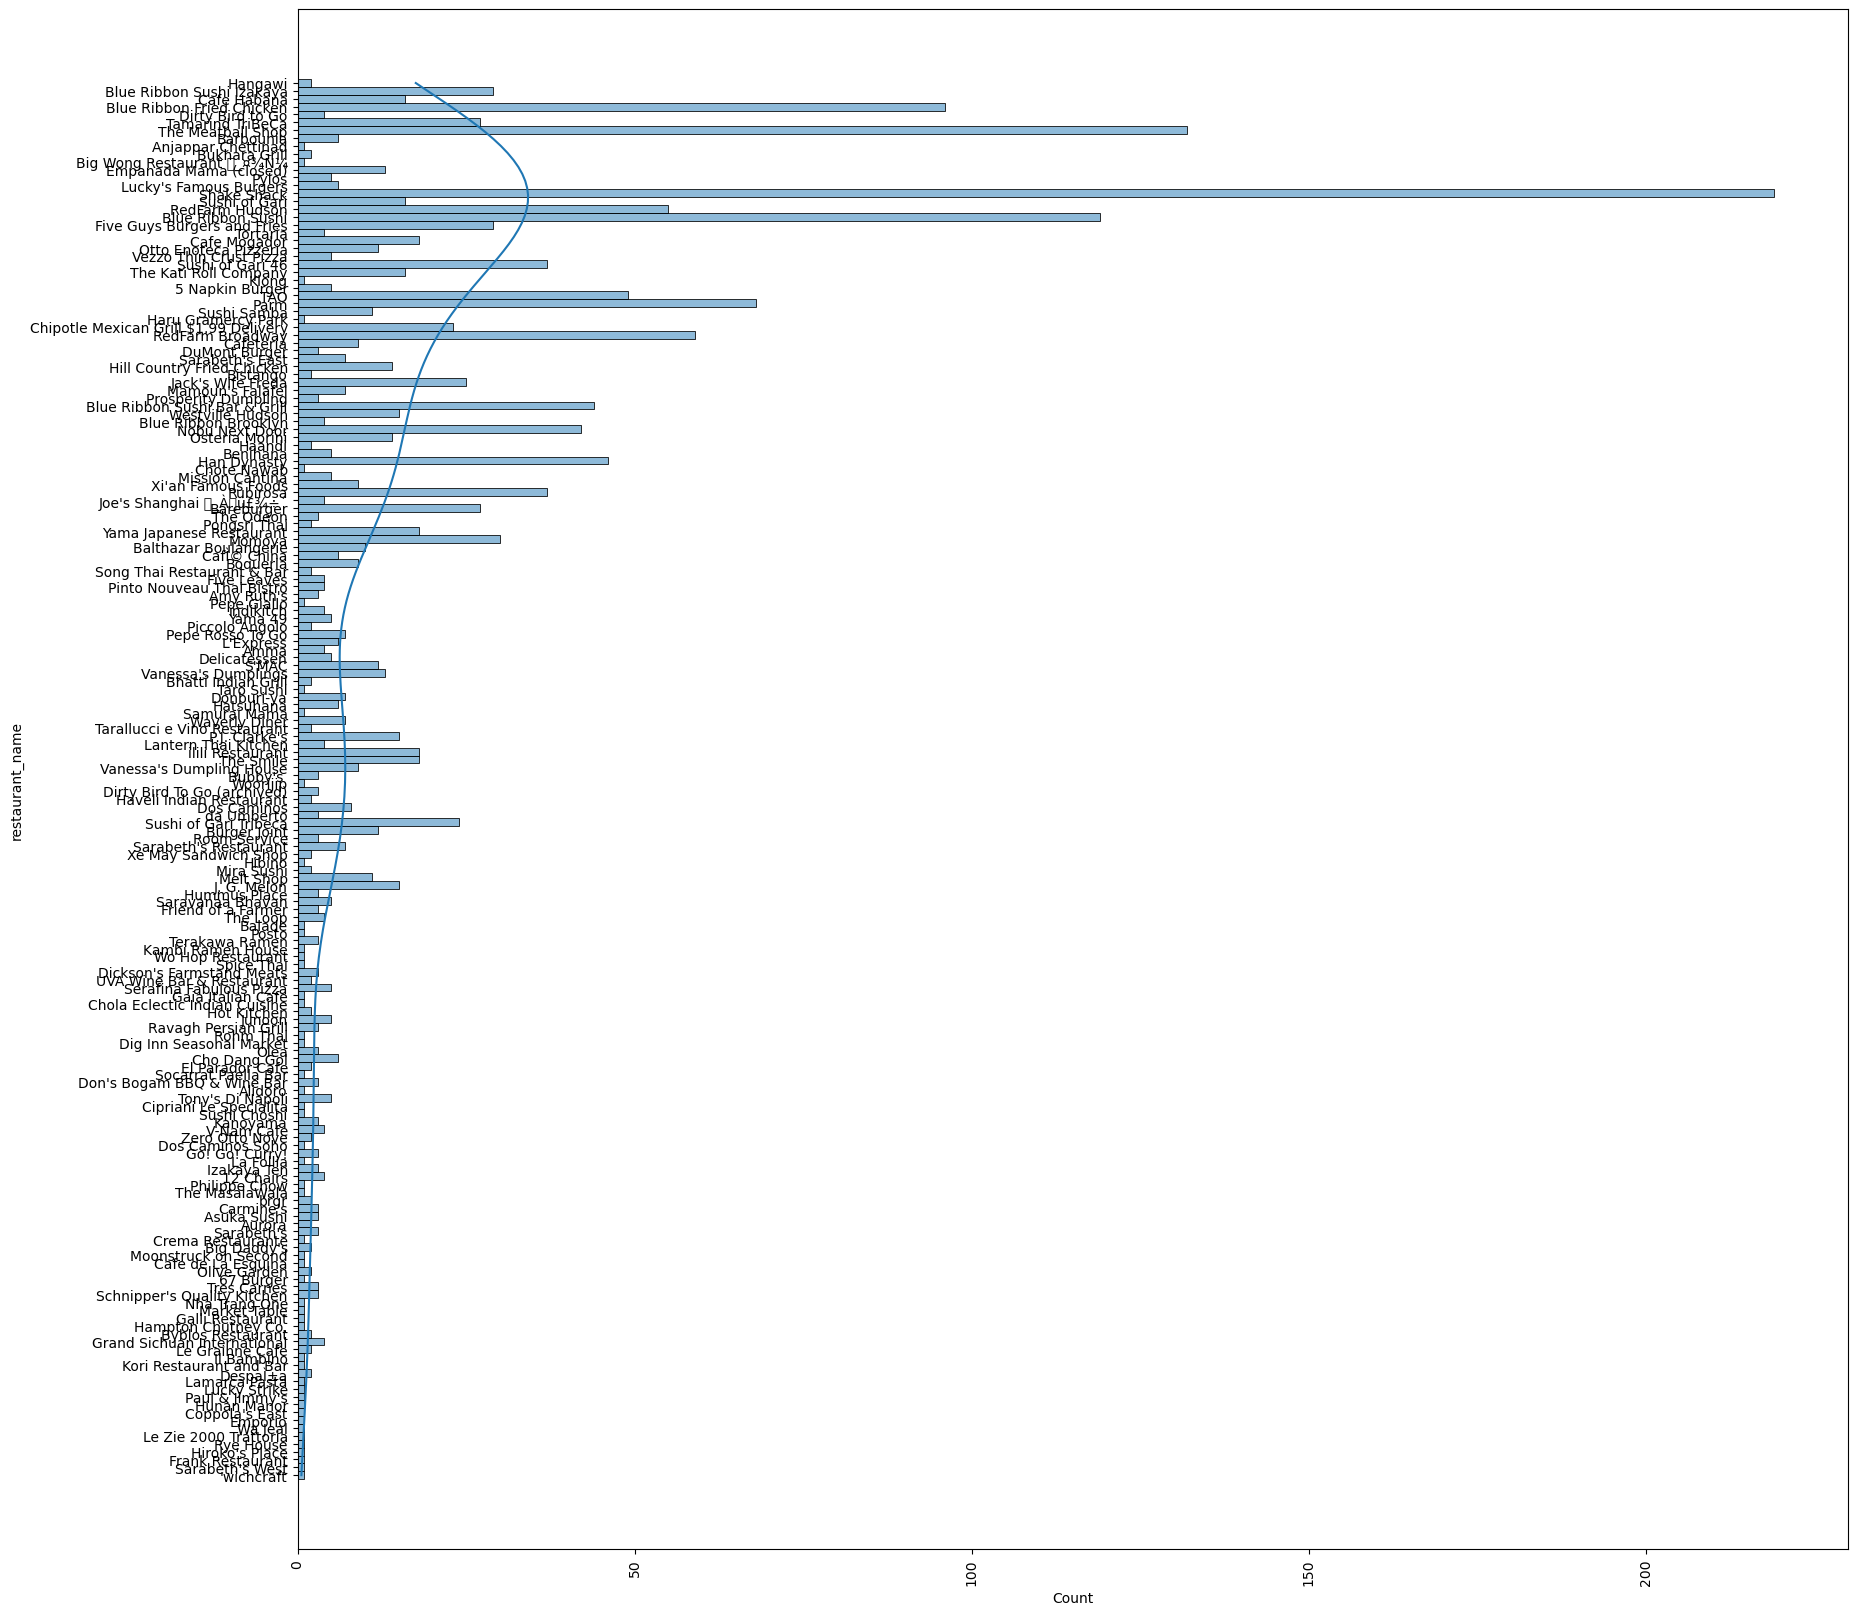

In [28]:
# Write the code here
plt.figure(figsize=(20,20));
sns.histplot(data=df, y='restaurant_name', kde=True);
plt.xticks(rotation=90);

In [29]:
#df["restaurant_name"].value_counts().tail();
df["restaurant_name"].value_counts(ascending=False).head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

In [30]:
df["restaurant_name"].value_counts(ascending=True).head()

restaurant_name
'wichcraft            1
Haru Gramercy Park    1
Philippe Chow         1
La Follia             1
Dos Caminos Soho      1
Name: count, dtype: int64

#### Observations:
#### restaurant_name
#### Top 5
- Shake Shack        ---->          219
- The Meatball Shop  ---->          132
- Blue Ribbon Sushi  ---->          119
- Blue Ribbon Fried Chicken  ---->  96
- Parm    ---->                     68
#### restaurant_name
#### Bottom 5 
- Sushi Choshi     --->   1
- Dos Caminos Soho --->   1
- La Follia      --->     1
- Philippe Chow --->      1
- 'wichcraft    --->      1


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

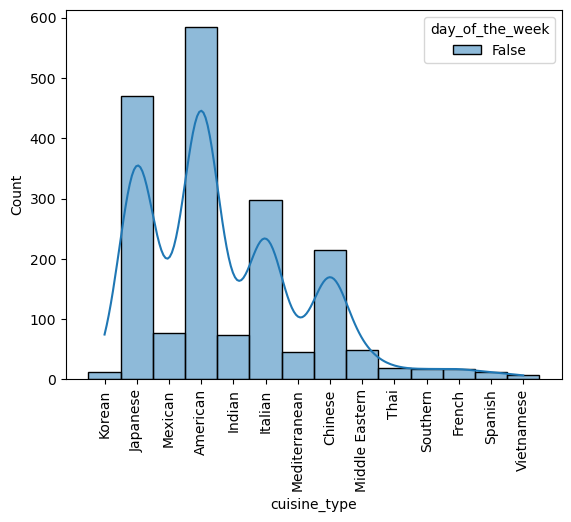

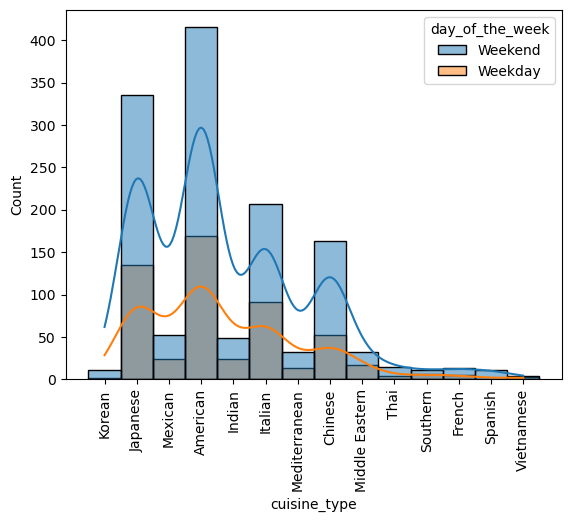

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,257,415,415
Japanese,335,335,335,335,335,199,335,335
Italian,207,207,207,207,207,110,207,207
Chinese,163,163,163,163,163,107,163,163
Mexican,53,53,53,53,53,32,53,53


In [31]:
# Write the code here
sns.histplot(data=df, x='cuisine_type', hue=df['day_of_the_week']=="weekends", kde=True);
plt.xticks(rotation=90);
plt.show();
sns.histplot(data=df, x='cuisine_type', hue='day_of_the_week', kde=True);
plt.xticks(rotation=90);
plt.show();
df[df['day_of_the_week'] =='Weekend'].groupby('cuisine_type').count().sort_values(by="restaurant_name",ascending=False).head()

#### Observations:
- American cusine is the most popular cuisine on weekends followed by Japanese.
- Vietnamese cusine is the least popular cuisine on weekends and weekdays.
- Vietnamese, Spanish and southern least Popular cuisine in this area.
- The demand on weekday is less compare to weekend

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [32]:
# Write the code here

In [33]:
cost_order_total=df["cost_of_the_order"].count()
cost_order_total
cost_order_greater_20=df.loc[df["cost_of_the_order"] > 20]
final_count=cost_order_greater_20["cost_of_the_order"].count()
fina_count_order=round((final_count/cost_order_total)*100)

#### Observations:
- 29.24130663856691 when we round it's 29 % of the total orders 

### **Question 10**: What is the mean order delivery time? [1 mark]

In [34]:
# Write the code here
df["delivery_time"].mean()


24.161749209694417

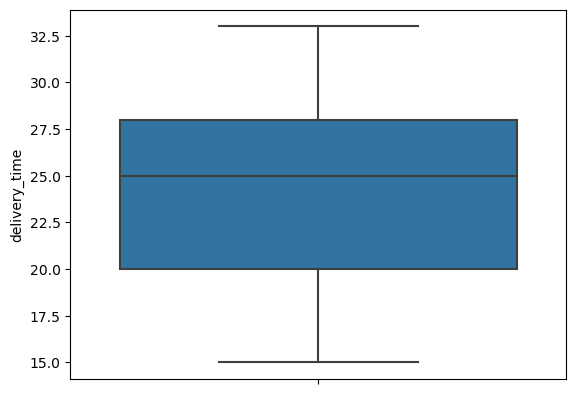

In [35]:
sns.boxplot(data=df,y="delivery_time");

#### Observations:
- 24.161749209694417 is the mean order delivery time 

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [79]:
# Write the code here
df.head()
df[["customer_id","order_id"]].groupby("customer_id").count().sort_values(by="order_id",axis=0,ascending=False).head(10)

,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7
82041,7
259341,7
276192,7
60052,6


#### Observations:
customer_id   order_id
- 52832	    --->     13
- 47440	    --->     10
- 83287	    --->     9
- what if the company increase the offer for the top 5 then we have a tie b/w 5 to 8 

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


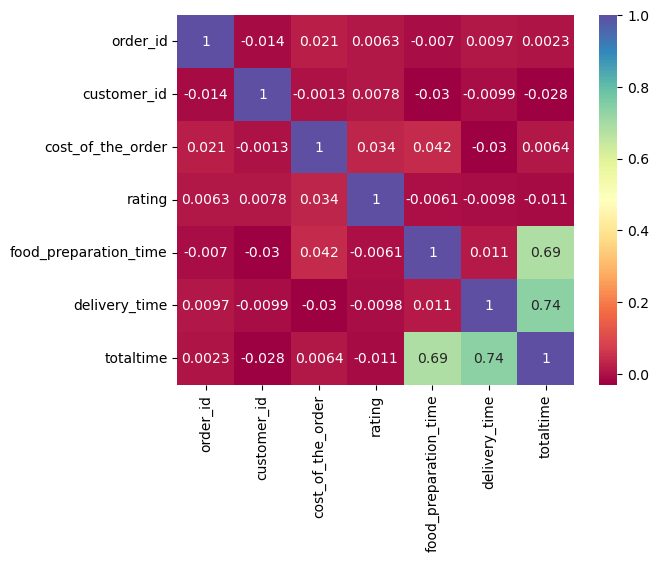

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time,totaltime
order_id,1.000000,-0.013960,0.021171,0.006308,-0.007026,0.009690,0.002288
customer_id,-0.013960,1.000000,-0.001322,0.007753,-0.030330,-0.009885,-0.027754
cost_of_the_order,0.021171,-0.001322,1.000000,0.033983,0.041527,-0.029949,0.006358
rating,0.006308,0.007753,0.033983,1.000000,-0.006083,-0.009804,-0.011348
food_preparation_time,-0.007026,-0.030330,0.041527,-0.006083,1.000000,0.011094,0.685970
delivery_time,0.009690,-0.009885,-0.029949,-0.009804,0.011094,1.000000,0.735195
totaltime,0.002288,-0.027754,0.006358,-0.011348,0.685970,0.735195,1.000000


In [65]:
# Write the code here
sns.heatmap(data=df.corr(numeric_only=True),cmap="Spectral",annot=True);
plt.show();
df.corr(numeric_only=True)

#### Observation 
- cost_of_the_order: Has Positive relation b/w rating(0.033983) and food_preparation_time(0.041527).
- rating: Has the Straight Positive Relation b/w cost_of_the_order(0.033983). There is negitive trend with -food_preparation_time and delivery_time
- food_preparation_time : Has Positive relation b/w cost_of_the_order(0.041527) and delivery_time(0.011094). It shows food_preparation_time is fast the delivery_time is fast.
- delivery_time:Has Positive relation b/w food_preparation_time(0.011094)
- Total Time : Has a co-relationship with food_preparation_time and food_preparation_time

#### Lets check the delivery_time vs cuisine_type vs food_preparation_time 

In [40]:
#sns.boxplot(data=df,x="delivery_time",y="food_preparation_time")

In [41]:
#sns.boxplot(data=df,x="delivery_time",y="cuisine_type")

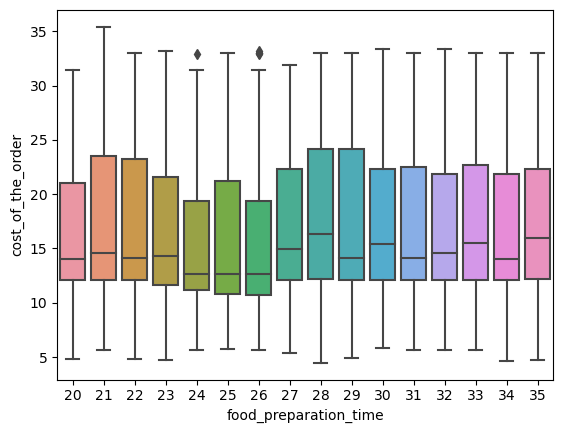

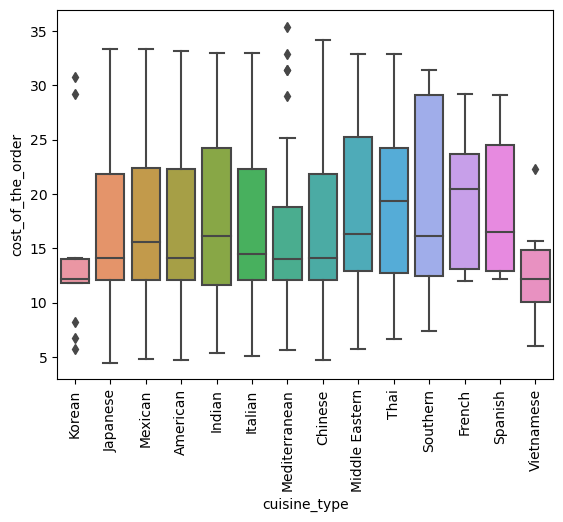

/Users/saisampath/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


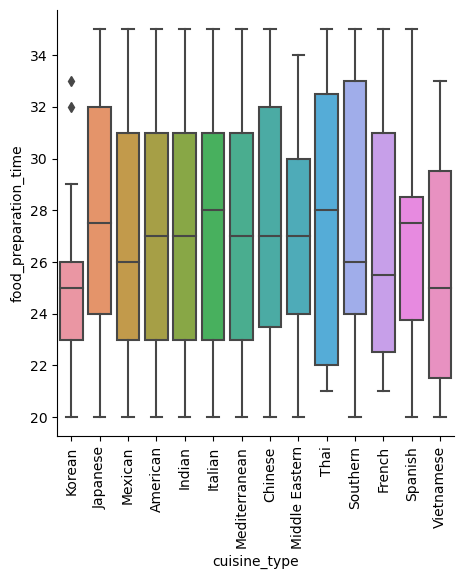

Food Preparation Time 27.371970495258168
Cost Of The Order 16.498851422550054


In [59]:
sns.boxplot(data=df,x="food_preparation_time",y="cost_of_the_order");
plt.show();
sns.boxplot(data=df,x="cuisine_type",y="cost_of_the_order");
plt.xticks(rotation=90);
plt.show();
sns.catplot(data=df,x="cuisine_type",y="food_preparation_time",kind="box");
plt.xticks(rotation=90);
plt.show();
print("Food Preparation Time",df["food_preparation_time"].mean());
print("Cost Of The Order",df["cost_of_the_order"].mean());

#### Observation 
- The avg Food Prepartion Time is 27.3 Most of the cuisine Food prepartion time are around the avg.Except Korean cuisine which has couple of outliner skwed to left.
- Korean cusine cost of the order has outliners on both righr and left. Need to investigate on the korean cusine relation with Food Prepartion and cost of the order
- Mediterranean cuisine has higher cost of order but they manage to prepare the food on the avg Time 
- We can see the some outliners in Korean, Mediterranean,Vietnamese cuisine with cost of the orders
- Vietnamese cuisine falls below the avg of the cost of the order. There is one outliner,but Vietnamese cuisine has less orders. This is similar to korean Cuisine 
- French Cuisine has highest avg cost of 20$
- Korean Cuisine take less time to Prepare, But there are some outliners, which are skew to right. This says the time taken to prepare Korean food varies. This could be one reason we can find out more .
- Avg food_preparation_time American, Indian, Mediterranean ,chinese, middle east Cuisine Falls in the Total avg time, None of these Cuisine in bottom list of the sales in weekday or weekend.

#### Let check the relation ship b/w weekend and weekdays 


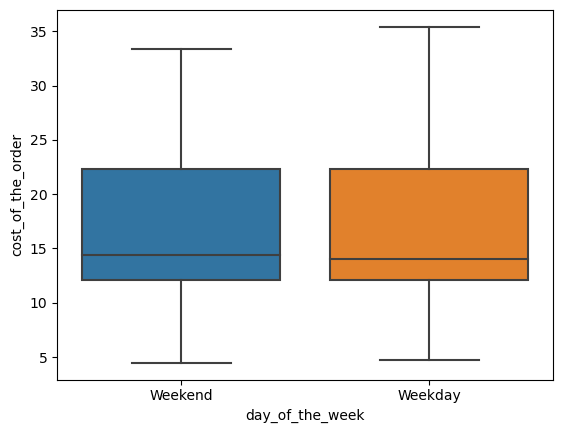

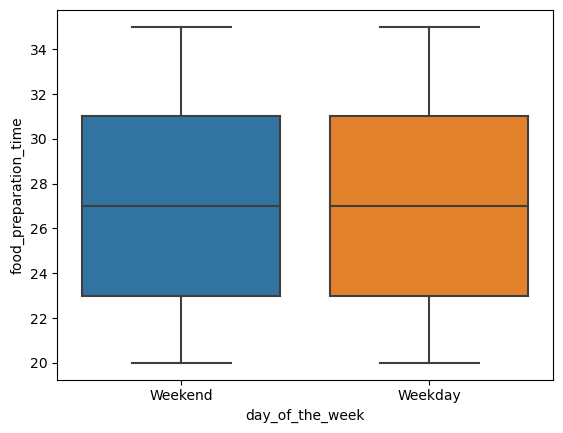

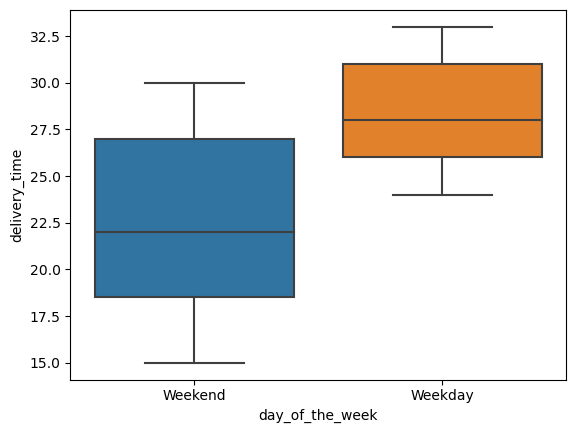

<Axes: xlabel='day_of_the_week', ylabel='count'>

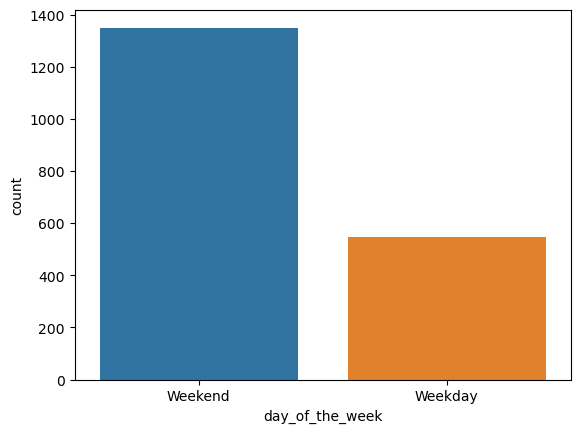

In [77]:
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order') 
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time') 
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time') 
plt.show()
sns.countplot(data=df,x='day_of_the_week')

#### Observation 
- cost of order is same between the weekday and weekend but, weekday has 5 days compare to weekend. weekends is making higher than weekdays.
- Delivery time on weekdays is more than could be due to peak time. however, the weekend has evenly distributed. 
- food preparation is evenly distributed on weekends and weekdays 

In [87]:
df.loc[df["cuisine_type"]=="Korean"].groupby("restaurant_name").value_counts().reset_index()

,restaurant_name,order_id,customer_id,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,totaltime,count
0,Cho Dang Gol,1476790,141732,Korean,12.18,Weekday,5.0,20,26,46,1
1,Cho Dang Gol,1477307,141732,Korean,5.77,Weekend,5.0,21,17,38,1
2,Cho Dang Gol,1477985,325272,Korean,12.13,Weekend,4.0,29,16,45,1
3,Cho Dang Gol,1478164,138024,Korean,11.84,Weekend,5.0,25,16,41,1
4,Cho Dang Gol,1478363,138024,Korean,29.25,Weekend,4.0,23,21,44,1
5,Don's Bogam BBQ & Wine Bar,1476894,384698,Korean,14.07,Weekend,3.0,33,16,49,1
6,Don's Bogam BBQ & Wine Bar,1477746,288777,Korean,12.61,Weekend,4.0,25,26,51,1
7,Kori Restaurant and Bar,1477461,241719,Korean,12.18,Weekday,4.0,26,26,52,1
8,Woorijip,1476856,59674,Korean,8.25,Weekend,3.0,26,26,52,1


#### Observation 
- The Woorijip, Don's Bogam BBQ & Wine Bar,Cho Dang Gol each restaurent had max time 26,33,29 food prepartion time whic impact on the overall korean chat. which resulted the 2 off the restaurent had 3 star rating. 
- The company needs to introduce a rating system for each category. so that we can get a clear idea of why Korean cuisine is at the bottom. we need to get the order details of the customer so that we can get the average time so improve the food delivery time 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [67]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,totaltime
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49


In [43]:
# Write the code here
df.info();
df_1=df[["rating","restaurant_name"]][df["rating"]!=0].groupby("restaurant_name").mean()>4;
df_1
df_2=df[["rating","restaurant_name"]][df["rating"]!=0].groupby("restaurant_name").count()>50
df_2
qualified=pd.merge(df_1[df_1["rating"]==True],df_2[df_2["rating"]==True],on ='restaurant_name')
qualified

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


,rating_x,rating_y
restaurant_name,,
Blue Ribbon Fried Chicken,True,True
Blue Ribbon Sushi,True,True
Shake Shack,True,True
The Meatball Shop,True,True


#### Observations:
- Blue Ribbon Fried Chicken,Blue Ribbon Sushi,Shake Shack,The Meatball Shop qualified for the promotionals 

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [44]:
# Write the code heres
import pandas as pd
data_1=pd.Series(df["cost_of_the_order"])
revenue=0
for i in range(len(data_1)):
    if (data_1[i] > 5) & (data_1[i]<=20) :
        total=data_1[i]*0.15
    elif data_1[i]>20:
        total=data_1[i]*0.25
    else:
        total=0
    revenue=revenue+total
print(revenue)

6166.302999999994


#### Observations:
- 6166.302999999994 total revenue to the company 

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [45]:
# Write the code here
df["totaltime"]=df[["food_preparation_time","delivery_time"]].sum(axis=1)
df_time=df[["restaurant_name","totaltime"]][df["totaltime"]>60].sort_values(by="totaltime",ascending=False).count()
df_time_observation=df["totaltime"].count()
df_time_final=(df_time/df_time_observation)*100
df_time_final

restaurant_name    10.537408
totaltime          10.537408
dtype: float64

#### Observations:
- 200 restuarents that delivery more than 60 min 
- totaltime percentage 10.537408

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [70]:
# Write the code here
df.head()
df.groupby('day_of_the_week')[['delivery_time']].agg(['mean','sum','count','std'])


delivery_time                       
                         mean    sum count       std
day_of_the_week                                     
Weekday             28.340037  15502   547  2.891428
Weekend             22.470022  30357  1351  4.628938

#### Observations:

- Weekday	28.340037 Mean values is more because there is 5 days in the weekday
- Weekend	22.470022 mean values is less because there is 2 day in the weekend
- However weekend is close to weekday 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Below is a summary of Key observations and conclusions

    -  High score  for rating is 5, rating concentrated around the highest, its possible very satisfied customers had rated service. (38%) is  unrated orders. Whether the unrated orders could change the direction of the rating either ways. 
    -  The avg of the cost of the order is 16.5 . 
    - There is a significantly higher demand  over the weekends. There is consistent orders irrespective of the day of the week. The delivery time is slightly higher on the weekends compare to the weekends.The food prepartion time is consistent irrespective of the day of the week  
    - American cuisine is the Top on both weekends and weekdays. The food preparation time is also on the average. Whereas, Korean cuisine has more skew data on cost of order and the food prepartion. 
    - American cuisine is the Top on both weekends and weekdays. The food preparation time is also on the average. Whereas, vietnamese cuisine ranked at the bottom with less orders. 

### Recommendations:

*  Based on the observations in this analysis below is recommended.

    - To Improve the customers rating rosponse would be the better rather than rating it to 'Not Given'. Instead leaving the rating empty Please keep a messager saying your rating will improve the customer satisfaction.
    - Just taking the on the overall rating we can categorize the different sections will help company to improve places it is lacking. 
    - The weekdays are having less sales compare to the weekend. To improve the sales company can campaign an offers for the students or the new subscribers on the weekdays. That could have potential to increase the sales in the weekdays. There could be one more reason is the delivery time during the weekdays the delivery time is too high.  
    - To improve on total order time (the total time taken between the customer placing the order and receiving their delivery) a review on how to bring down delivery time can be assessed to improve on overall service. A curious question also arises on whether the high delivery time is the cause of low orders during the weekdays.A review of whether customers shun ordering on weekdays because they anticipate a longer processing time for their order. Also could weekday traffic be the cause of the higher delivery time on weekdays?

---